In [13]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

In [14]:
file_path = 'phpkIxskf.arff'
data = arff.loadarff(file_path)
df = pd.DataFrame(data[0])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,b'technician',b'married',b'tertiary',b'no',825.0,b'no',b'no',b'cellular',17.0,b'nov',977.0,3.0,-1.0,0.0,b'unknown',b'2'
45207,71.0,b'retired',b'divorced',b'primary',b'no',1729.0,b'no',b'no',b'cellular',17.0,b'nov',456.0,2.0,-1.0,0.0,b'unknown',b'2'
45208,72.0,b'retired',b'married',b'secondary',b'no',5715.0,b'no',b'no',b'cellular',17.0,b'nov',1127.0,5.0,184.0,3.0,b'success',b'2'
45209,57.0,b'blue-collar',b'married',b'secondary',b'no',668.0,b'no',b'no',b'telephone',17.0,b'nov',508.0,4.0,-1.0,0.0,b'unknown',b'1'


C:\Users\kovalenko\AppData\Local\Temp\ipykernel_16608\1148003813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


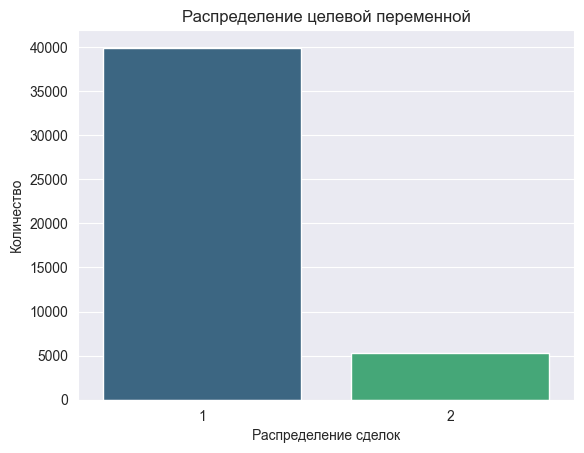

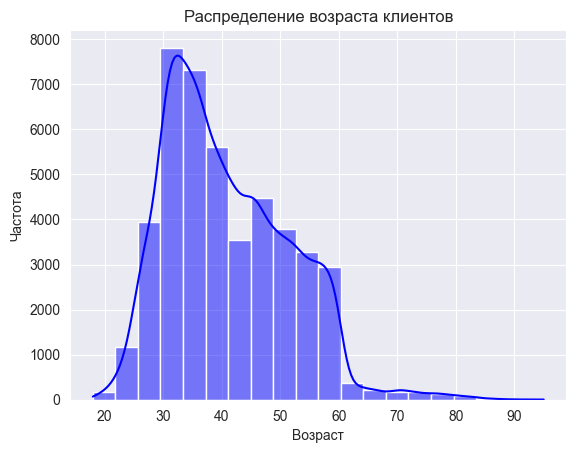

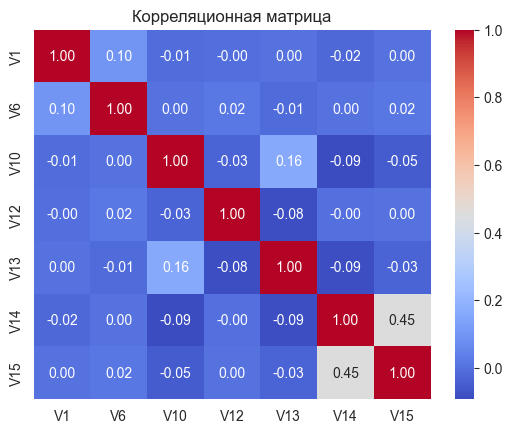

In [15]:
sns.countplot(data=df, x='Class', palette='viridis')
plt.title("Распределение целевой переменной")
plt.xlabel("Распределение сделок")
plt.ylabel("Количество")
plt.show()

sns.histplot(df['V1'], bins=20, kde=True, color="blue")
plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

C:\Users\kovalenko\AppData\Local\Temp\ipykernel_16608\1759507694.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis', ax=ax[0])
C:\Users\kovalenko\AppData\Local\Temp\ipykernel_16608\1759507694.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis', ax=ax[1])


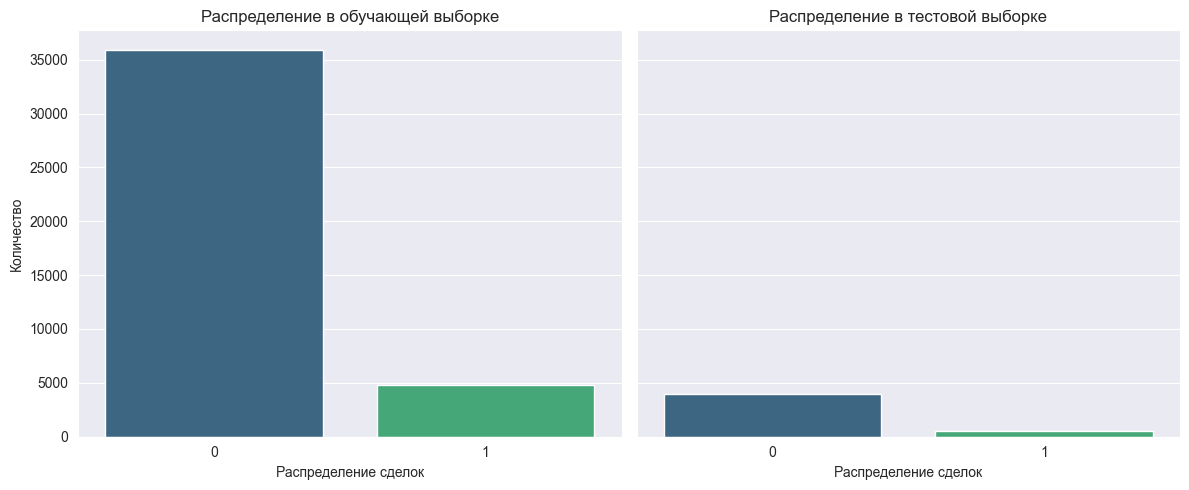

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x=y_train, palette='viridis', ax=ax[0])
ax[0].set_title("Распределение в обучающей выборке")
ax[0].set_xlabel("Распределение сделок")
ax[0].set_ylabel("Количество")

sns.countplot(x=y_test, palette='viridis', ax=ax[1])
ax[1].set_title("Распределение в тестовой выборке")
ax[1].set_xlabel("Распределение сделок")

plt.tight_layout()
plt.show()

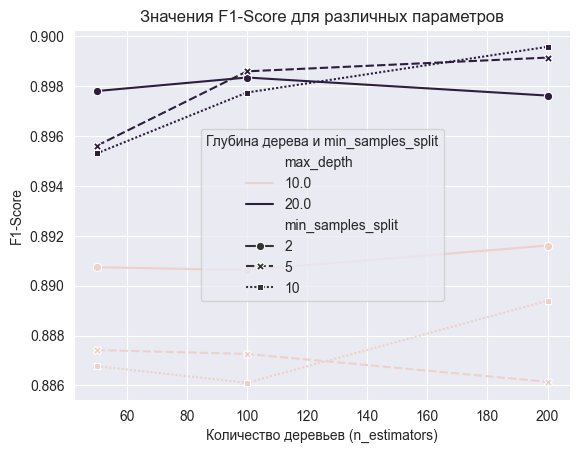

In [17]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

best_model = None
best_f1 = 0
best_params = {}
f1_scores = []

for n in params['n_estimators']:
    for depth in params['max_depth']:
        for split in params['min_samples_split']:
            model = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')
            f1_scores.append((n, depth, split, f1))
            if f1 > best_f1:
                best_f1 = f1
                best_model = model
                best_params = {'n_estimators': n, 'max_depth': depth, 'min_samples_split': split}

f1_df = pd.DataFrame(f1_scores, columns=['n_estimators', 'max_depth', 'min_samples_split', 'f1_score'])
sns.lineplot(data=f1_df, x='n_estimators', y='f1_score', hue='max_depth', style='min_samples_split', markers=True)
plt.title("Значения F1-Score для различных параметров")
plt.xlabel("Количество деревьев (n_estimators)")
plt.ylabel("F1-Score")
plt.legend(title="Глубина дерева и min_samples_split")
plt.show()

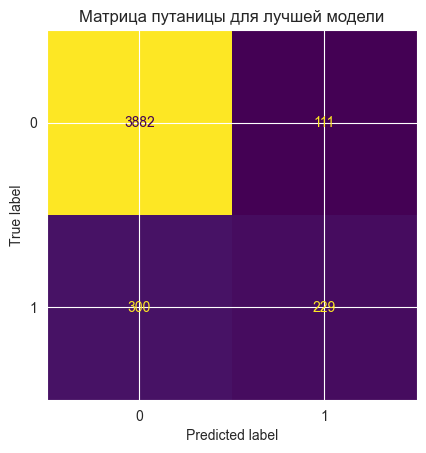

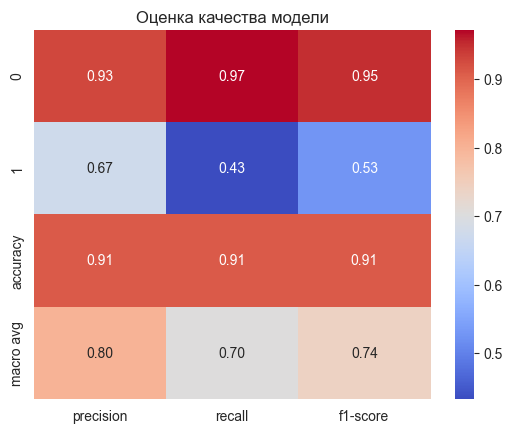

In [18]:
y_pred = best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis', colorbar=False)
plt.title("Матрица путаницы для лучшей модели")
plt.show()

metrics = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(metrics).transpose()
sns.heatmap(metrics_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Оценка качества модели")
plt.show()

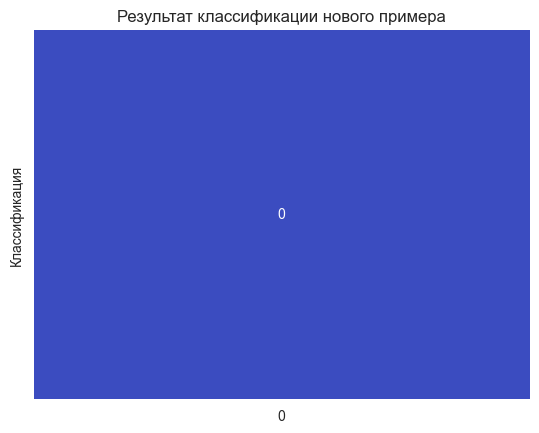

In [19]:
new_data = X_test.iloc[0:1]  # Используем тестовую выборку как пример
classification_result = best_model.predict(new_data)

sns.heatmap(pd.DataFrame(classification_result, columns=["Классификация"]).T, annot=True, cmap="coolwarm", cbar=False)
plt.title("Результат классификации нового примера")
plt.show()